<a href="https://colab.research.google.com/github/chung-anching/pix2pix/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 獲取授權碼之後輸入即可連動雲端硬碟

Mounted at /content/gdrive


In [3]:
%cd "/content/gdrive/My Drive/書法字體資料集/DataRandom"

/content/gdrive/.shortcut-targets-by-id/1PlRV_OuZEl5CGOjFQHMkTEmjjxx0ZsE5/DataRandom


In [4]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

train_x = []
train_y = []
for i in os.listdir('./楷書/train')[:1600]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/train/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  train_x.append(img) 
  train_y.append(0) 

for i in os.listdir('./隸書/train')[:1600]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/train/'+i,cv2.IMREAD_COLOR) 
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250 
  train_x.append(img)
  train_y.append(2)

for i in os.listdir('./行書/train')[:1600]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/train/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  train_x.append(img)
  train_y.append(1)

In [5]:
train_xx = np.array(train_x).reshape(len(train_x), 224, 224, 3)
print(train_xx.shape) 
train_yy = np.array(train_y).reshape(len(train_y), 1)
print(train_yy.shape)

(4800, 224, 224, 3)
(4800, 1)


In [6]:
val_x = []
val_y = []

for i in os.listdir('./行書/train')[1600:2000]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/train/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  val_x.append(img)
  val_y.append(1)

for i in os.listdir('./隸書/train')[1600:2000]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/train/'+i,cv2.IMREAD_COLOR) 
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250 
  val_x.append(img)
  val_y.append(2)

for i in os.listdir('./楷書/train')[1600:2000]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/train/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  val_x.append(img)
  val_y.append(0)

val_xx = np.array(val_x).reshape(len(val_x), 224, 224, 3)
print(val_xx.shape) 
val_yy = np.array(val_y).reshape(len(val_y), 1) 
print(val_yy.shape) 

(1200, 224, 224, 3)
(1200, 1)


In [7]:
test_x = []
test_y = []
for i in os.listdir('./行書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  test_x.append(img)
  test_y.append(1)

for i in os.listdir('./隸書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  test_x.append(img)
  test_y.append(2)

for i in os.listdir('./楷書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  test_x.append(img)
  test_y.append(0)

test_xx = np.array(test_x).reshape(len(test_x), 224, 224, 3)
print(test_xx.shape) 
test_yy = np.array(test_y).reshape(len(test_y), 1) 
print(test_yy.shape) 

(1200, 224, 224, 3)
(1200, 1)


In [8]:
train_yy = np.eye(3)[train_yy.reshape(-1)]
test_yy = np.eye(3)[test_yy.reshape(-1)]
val_yy = np.eye(3)[val_yy.reshape(-1)]

print(train_xx.shape)
print(train_yy.shape)
print(test_xx.shape)
print(test_yy.shape)
print(val_xx.shape)
print(val_yy.shape)

(4800, 224, 224, 3)
(4800, 3)
(1200, 224, 224, 3)
(1200, 3)
(1200, 224, 224, 3)
(1200, 3)


In [9]:
from tensorflow.keras.applications import vgg16

# model_try = Sequential()

#vgg16_model = keras.applications.vgg16.VGG16()
base_model_vgg16 = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
i = 1
for layer in base_model_vgg16.layers:
  if i < 16:
    layer.trainable = False
  else:
    layer.trainable = True
  i += 1
base_model_vgg16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [10]:
len(base_model_vgg16.layers)

19

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# use “get_layer” method to save the last layer of the network
# save the output of the last layer to be the input of the next layer

last_layer = base_model_vgg16.get_layer('block5_pool')
last_output = last_layer.output

# flatten the classifier input which is output of the last layer of VGG16 model
x = Flatten()(last_output)

In [12]:
# add a 64 unit FC layer and relu activation 
x = Dense(64, activation='relu', name='FC_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# add our new softmax layer with 2 units
x = Dense(3, activation='softmax', name='softmax')(x)

# instantiate實例化 a new_model using keras’s Model class
new_model = Model(inputs=base_model_vgg16.input, outputs=x)
# print the new_model summary
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## decay=1e-4, lr = 1e-4, batch size = 32

In [13]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')


from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_1lr4_bs32.csv')

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_1lr4_bs32.csv')
mc = ModelCheckpoint(
    os.path.join('./result_VGG16_1lr4_bs32', 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    save_freq=(train_xx.shape[0] // 32),
    mode='min')

In [14]:
lr    = 1e-4 #0.0005, 0.00005
decay = 1e-4   #1e-6

num_epochs = 100
batch_size = 32  #64
steps_per_epoch  = 1600 // batch_size #4
validation_steps = (2000 - 1600) // batch_size #2


from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
optimizer = tf.optimizers.Adam(learning_rate=lr,decay=decay)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
!nvidia-smi

Mon Dec 27 07:39:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    73W / 149W |    271MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix

checkpointer = ModelCheckpoint(filepath='model_vgg16_lr4_bs32.100epochs.hdf5', verbose=1, save_best_only=True)#filepath保存模型的路徑
history = new_model.fit(train_xx, train_yy, batch_size=32, epochs=100, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=4, validation_data=(val_xx, val_yy), validation_steps=2, verbose=2, shuffle=True)

Epoch 1/100
Epoch 0, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 24s - loss: 1.1405 - accuracy: 0.5078 - val_loss: 0.2721 - val_accuracy: 0.9531 - 24s/epoch - 6s/step
Epoch 2/100
Epoch 1, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 2s - loss: 0.5755 - accuracy: 0.7656 - val_loss: 0.0799 - val_accuracy: 0.9844 - 2s/epoch - 391ms/step
Epoch 3/100
Epoch 2, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 2s - loss: 0.2649 - accuracy: 0.9219 - val_loss: 0.0505 - val_accuracy: 0.9844 - 2s/epoch - 393ms/step
Epoch 4/100
Epoch 3, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': F

In [17]:
score = new_model.evaluate(test_xx, test_yy, verbose=0)
print('\n', 'Test accuracy:', score[1])
new_model.save('model_vgg16_1lr4_bs32_100epochs.h5')


 Test accuracy: 0.9916666746139526


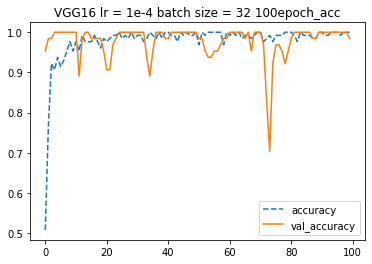

In [18]:
import csv
accuracy = []
loss = []
val_loss = []
val_accuracy = []

        
with open('./curve_VGG16_1lr4_bs32.csv') as f:
    myCsv = csv.reader(f)
    headers = next(myCsv)
    for row in myCsv:
        #print(row)
        val_accuracy.append(float(row[3]))
        val_loss.append(float(row[4]))
        loss.append(float(row[2]))
        accuracy.append(float(row[1]))

import matplotlib.pyplot as plt

plt.title("VGG16 lr = 1e-4 batch size = 32 100epoch_acc")
plt.plot(np.array(list(range(100))), np.array(accuracy[0:100]), label = "accuracy", linestyle="--")
plt.plot(np.array(list(range(100))), np.array(val_accuracy[:100]), label = "val_accuracy", linestyle="-")
plt.legend()
plt.show()

In [19]:
y_hat = new_model.predict(test_xx)

In [20]:
y_hat

array([[3.7015248e-03, 9.8807448e-01, 8.2240654e-03],
       [6.1676389e-04, 9.9473947e-01, 4.6437946e-03],
       [1.7730187e-04, 9.9976104e-01, 6.1589257e-05],
       ...,
       [9.9956626e-01, 3.1966082e-04, 1.1409047e-04],
       [9.9986541e-01, 2.6563621e-05, 1.0804040e-04],
       [9.9987078e-01, 8.4021645e-05, 4.5232271e-05]], dtype=float32)

In [21]:
y_hat = new_model.predict(test_xx)

predict = np.argmax(y_hat, axis = 1)
len(predict) #[0:220]
print(predict[:400])
print(predict[400:800])
print(predict[800:1200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

# 找出預測錯誤的圖片:

/content/gdrive/.shortcut-targets-by-id/1PlRV_OuZEl5CGOjFQHMkTEmjjxx0ZsE5/DataRandom


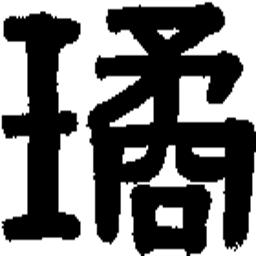

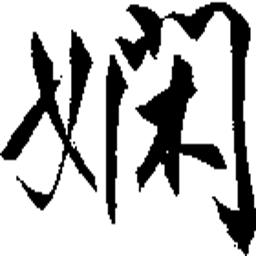

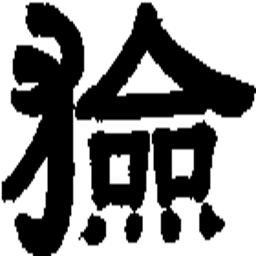

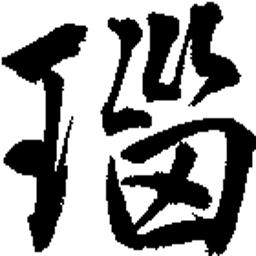

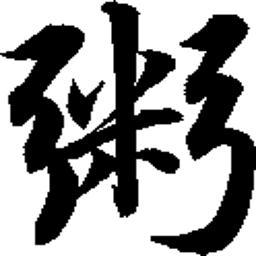

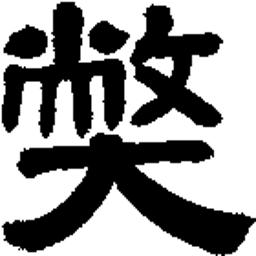

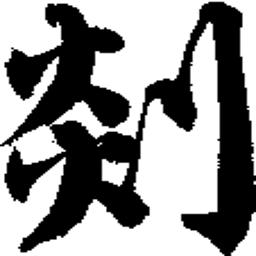

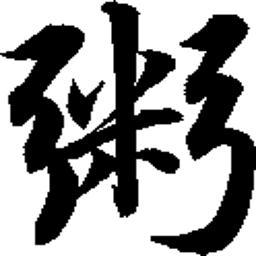

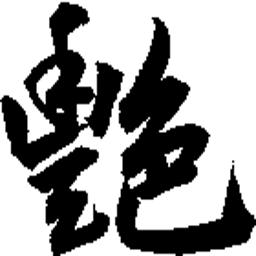

In [24]:
from google.colab.patches import cv2_imshow
%cd "/content/gdrive/My Drive/書法字體資料集/DataRandom/"

def prediction(img, num, type, i): #num是類別分類
  y_hat = new_model.predict(img)
  predict = np.argmax(y_hat, axis = 1)

  if predict != num:
    img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/'+ type +'/test/'+i,cv2.IMREAD_COLOR)

    cv2_imshow(img)
    #plt.savefig('VGG圖片結果/1_32/' +type+"/"+i+ '.png')
    cv2.imwrite('VGG圖片結果/1_32/' +type+"/"+i+ '.png', img)

for i in os.listdir('./行書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)

  prediction(img, 1, "行書", i)



In [25]:
for i in os.listdir('./隸書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 2, "隸書", i)

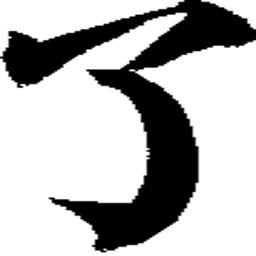

In [26]:
for i in os.listdir('./楷書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 0, "楷書", i)


## lr = 5e-4, batch size = 32

In [27]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')


from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_5lr4_bs32.csv')

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_5lr4_bs32.csv')
mc = ModelCheckpoint(
    os.path.join('./result_VGG16_5lr4_bs32', 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    save_freq=5*(train_xx.shape[0] // 64),
    mode='min')

In [28]:
lr    = 5e-4 #0.0005, 0.00005
decay = 1e-4   #1e-6

num_epochs = 100
batch_size = 32  #64
steps_per_epoch  = 1600 // batch_size #4
validation_steps = (2000 - 1600) // batch_size #2


from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
optimizer = tf.optimizers.Adam(learning_rate=lr,decay=decay)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
!nvidia-smi

Mon Dec 27 07:49:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    75W / 149W |   8596MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix

checkpointer = ModelCheckpoint(filepath='model_vgg16_5lr4_bs32.100epochs.hdf5', verbose=1, save_best_only=True) #filepath保存模型的路徑
history = new_model.fit(train_xx, train_yy, batch_size=32, epochs=100, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=4, validation_data=(val_xx, val_yy), validation_steps=2, verbose=2, shuffle=True)

Epoch 1/100
Epoch 0, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 4s - loss: 0.1048 - accuracy: 0.9297 - val_loss: 0.0022 - val_accuracy: 1.0000 - 4s/epoch - 946ms/step
Epoch 2/100
Epoch 1, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 2s - loss: 0.1907 - accuracy: 0.9531 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 398ms/step
Epoch 3/100
Epoch 2, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 2s - loss: 0.0761 - accuracy: 0.9844 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 403ms/step
Epoch 4/100
Epoch 3, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07,

In [31]:
score = new_model.evaluate(test_xx, test_yy, verbose=0)
print('\n', 'Test accuracy:', score[1])
new_model.save('model_vgg16_5lr4_bs32_100epochs.h5')


 Test accuracy: 0.9916666746139526


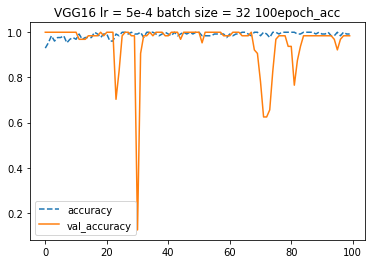

In [32]:
import csv
accuracy = []
loss = []
val_loss = []
val_accuracy = []

        
with open('./curve_VGG16_5lr4_bs32.csv') as f:
    myCsv = csv.reader(f)
    headers = next(myCsv)
    for row in myCsv:
        #print(row)
        val_accuracy.append(float(row[3]))
        val_loss.append(float(row[4]))
        loss.append(float(row[2]))
        accuracy.append(float(row[1]))

import matplotlib.pyplot as plt

plt.title("VGG16 lr = 5e-4 batch size = 32 100epoch_acc")
plt.plot(np.array(list(range(100))), np.array(accuracy[0:100]), label = "accuracy", linestyle="--")
plt.plot(np.array(list(range(100))), np.array(val_accuracy[:100]), label = "val_accuracy", linestyle="-")
plt.legend()
plt.show()

In [33]:
y_hat = new_model.predict(test_xx)

predict = np.argmax(y_hat, axis = 1)
len(predict) #[0:220]
print(predict[:400])
print(predict[400:800])
print(predict[800:1200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

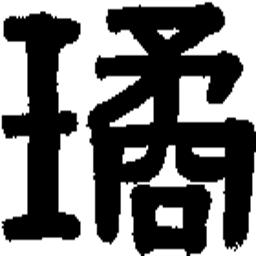

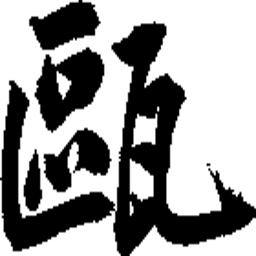

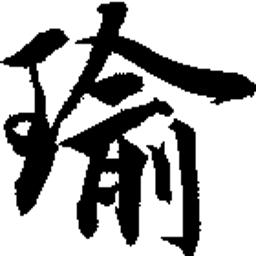

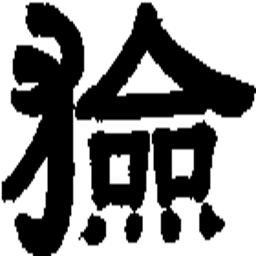

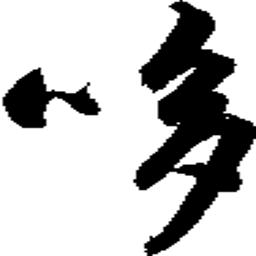

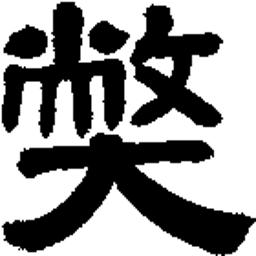

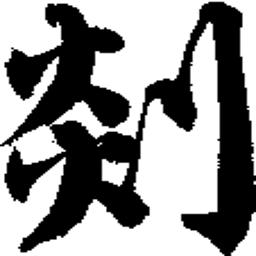

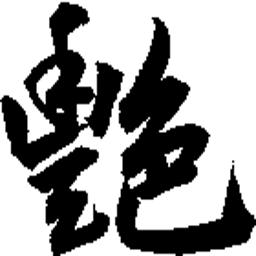

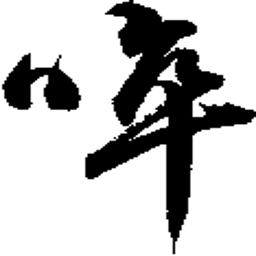

In [35]:
def prediction(img, num, type, i): #num是類別分類
  y_hat = new_model.predict(img)
  predict = np.argmax(y_hat, axis = 1)
  if predict != num:
    img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/'+ type +'/test/'+i,cv2.IMREAD_COLOR)
    cv2_imshow(img)
    cv2.imwrite('VGG圖片結果/5_32/' +type+"/"+i+ '.png', img)

for i in os.listdir('./行書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)

  prediction(img, 1, "行書", i)



In [36]:
for i in os.listdir('./隸書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 2, "隸書", i)

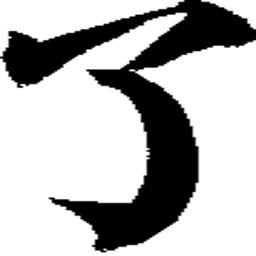

In [37]:
for i in os.listdir('./楷書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 0, "楷書", i)


## lr = 1e-4, batch size = 64

In [38]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')


from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_1lr4_bs64.csv')

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_1lr4_bs64.csv')
mc = ModelCheckpoint(
    os.path.join('./result_VGG16_1lr4_bs64', 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    save_freq=5*(train_xx.shape[0] // 64),
    mode='min')

In [39]:
lr    = 1e-4 #0.0005, 0.00005
decay = 1e-4   #1e-6

num_epochs = 100
batch_size = 64  #64
steps_per_epoch  = 1600 // batch_size #4
validation_steps = (2000 - 1600) // batch_size #2


from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
optimizer = tf.optimizers.Adam(learning_rate=lr,decay=decay)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix

checkpointer = ModelCheckpoint(filepath='model_vgg16_1lr4_bs64.100epochs.hdf5', verbose=1, save_best_only=True) #filepath保存模型的路徑
history = new_model.fit(train_xx, train_yy, batch_size=64, epochs=100, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=4, validation_data=(val_xx, val_yy), validation_steps=2, verbose=2, shuffle=True)

Epoch 1/100
Epoch 0, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 22s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9922 - 22s/epoch - 6s/step
Epoch 2/100
Epoch 1, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 3s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9922 - 3s/epoch - 762ms/step
Epoch 3/100
Epoch 2, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 3s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9922 - 3s/epoch - 762ms/step
Epoch 4/100
Epoch 3, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': F

In [41]:
score = new_model.evaluate(test_xx, test_yy, verbose=0)
print('\n', 'Test accuracy:', score[1])
new_model.save('model_vgg16_1lr4_bs64_100epochs.h5')


 Test accuracy: 0.9958333373069763


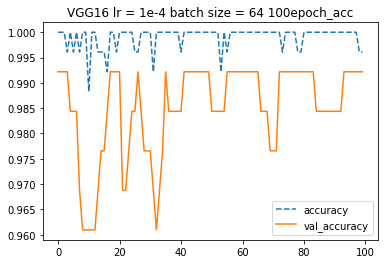

In [42]:
import csv
accuracy = []
loss = []
val_loss = []
val_accuracy = []

        
with open('./curve_VGG16_1lr4_bs64.csv') as f:
    myCsv = csv.reader(f)
    headers = next(myCsv)
    for row in myCsv:
        #print(row)
        val_accuracy.append(float(row[3]))
        val_loss.append(float(row[4]))
        loss.append(float(row[2]))
        accuracy.append(float(row[1]))

import matplotlib.pyplot as plt

plt.title("VGG16 lr = 1e-4 batch size = 64 100epoch_acc")
plt.plot(np.array(list(range(100))), np.array(accuracy[0:100]), label = "accuracy", linestyle="--")
plt.plot(np.array(list(range(100))), np.array(val_accuracy[:100]), label = "val_accuracy", linestyle="-")
plt.legend()
plt.show()

In [43]:
y_hat = new_model.predict(test_xx)

predict = np.argmax(y_hat, axis = 1)
len(predict) #[0:220]
print(predict[:400])
print(predict[400:800])
print(predict[800:1200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

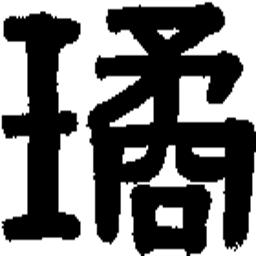

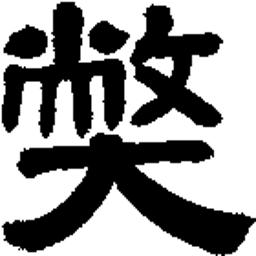

In [44]:
def prediction(img, num, type, i): #num是類別分類
  y_hat = new_model.predict(img)
  predict = np.argmax(y_hat, axis = 1)
  if predict != num:
    img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/'+ type +'/test/'+i,cv2.IMREAD_COLOR)
    cv2_imshow(img)
    cv2.imwrite('VGG圖片結果/1_64/' +type+"/"+i+ '.png', img)

for i in os.listdir('./行書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)

  prediction(img, 1, "行書", i)



In [45]:
for i in os.listdir('./隸書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 2, "隸書", i)

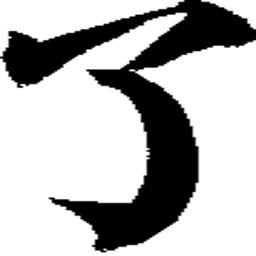

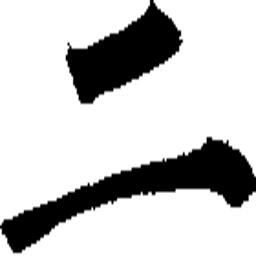

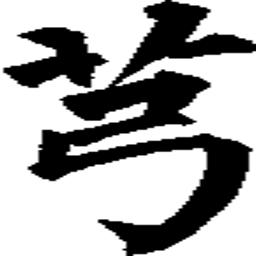

In [46]:
for i in os.listdir('./楷書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 0, "楷書", i)


## lr = 5e-4, batch size = 64

In [47]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')


from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_5lr4_bs64.csv')

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_VGG16_5lr4_bs64.csv')
mc = ModelCheckpoint(
    os.path.join('./result_VGG16_5lr4_bs64', 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    save_freq=5*(train_xx.shape[0] // 64),
    mode='min')

In [48]:
lr    = 5e-4 #0.0005, 0.00005
decay = 1e-4   #1e-6

num_epochs = 100
batch_size = 64  #64
steps_per_epoch  = 1600 // batch_size #4
validation_steps = (2000 - 1600) // batch_size #2


from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
optimizer = tf.optimizers.Adam(learning_rate=lr,decay=decay)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix

checkpointer = ModelCheckpoint(filepath='model_vgg16_5r4_bs64.100epochs.hdf5', verbose=1, save_best_only=True) #filepath保存模型的路徑
history = new_model.fit(train_xx, train_yy, batch_size=batch_size, epochs=100, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=4, validation_data=(val_xx, val_yy), validation_steps=2, verbose=2, shuffle=True)

Epoch 1/100
Epoch 0, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 5s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2139 - val_accuracy: 0.9453 - 5s/epoch - 1s/step
Epoch 2/100
Epoch 1, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 3s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9766 - 3s/epoch - 770ms/step
Epoch 3/100
Epoch 2, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
4/4 - 3s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9844 - 3s/epoch - 767ms/step
Epoch 4/100
Epoch 3, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad':

In [50]:
score = new_model.evaluate(test_xx, test_yy, verbose=0)
print('\n', 'Test accuracy:', score[1])
new_model.save('model_vgg16_5lr4_bs64_100epochs.h5')


 Test accuracy: 0.9975000023841858


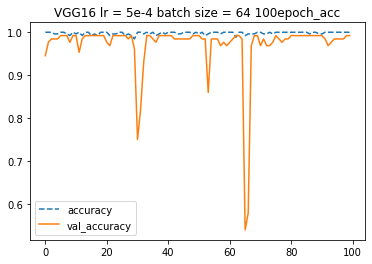

In [51]:
import csv
accuracy = []
loss = []
val_loss = []
val_accuracy = []

        
with open('./curve_VGG16_5lr4_bs64.csv') as f:
    myCsv = csv.reader(f)
    headers = next(myCsv)
    for row in myCsv:
        #print(row)
        val_accuracy.append(float(row[3]))
        val_loss.append(float(row[4]))
        loss.append(float(row[2]))
        accuracy.append(float(row[1]))

import matplotlib.pyplot as plt

plt.title("VGG16 lr = 5e-4 batch size = 64 100epoch_acc")
plt.plot(np.array(list(range(100))), np.array(accuracy[0:100]), label = "accuracy", linestyle="--")
plt.plot(np.array(list(range(100))), np.array(val_accuracy[:100]), label = "val_accuracy", linestyle="-")
plt.legend()
plt.show()

In [52]:
y_hat = new_model.predict(test_xx)

predict = np.argmax(y_hat, axis = 1)
len(predict) #[0:220]
print(predict[:400])
print(predict[400:800])
print(predict[800:1200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

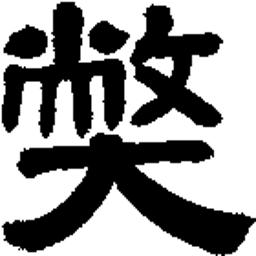

In [53]:
def prediction(img, num, type, i): #num是類別分類
  y_hat = new_model.predict(img)
  predict = np.argmax(y_hat, axis = 1)
  if predict != num:
    img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/'+ type +'/test/'+i,cv2.IMREAD_COLOR)
    cv2_imshow(img)
    cv2.imwrite('VGG圖片結果/5_64/' +type+"/"+i+ '.png', img)

for i in os.listdir('./行書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/行書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)

  prediction(img, 1, "行書", i)



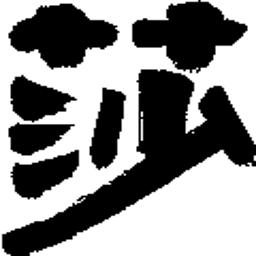

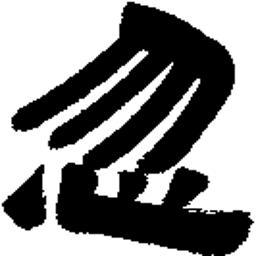

In [54]:
for i in os.listdir('./隸書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/隸書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 2, "隸書", i)

In [55]:
for i in os.listdir('./楷書/test')[:400]:
  img = cv2.imread('/content/gdrive/MyDrive/書法字體資料集/DataRandom/楷書/test/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  img = np.array(img).reshape(1, 224, 224, 3)
  prediction(img, 0, "楷書", i)
